# --- Introduction ---

"""
Project: Titanic Survival Prediction

Goal: To predict whether a passenger survived the Titanic disaster, based on their attributes.

Dataset: The Titanic dataset from Kaggle (train.csv).

This notebook demonstrates the full data science lifecycle, from data collection to recommendations.
"""

# --- Data Collection ---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Load data
df = pd.read_csv('train.csv')
print("Data loaded successfully.")
df.head(2)

Data loaded successfully.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# --- Data Preprocessing and Cleaning ---

"""
This section handles missing values, feature engineering, and data transformations to prepare the data for modeling.
"""

In [3]:
# Handle missing ages
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

In [4]:
# Handle missing Embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [5]:
# Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [6]:
# Convert categorical to numerical
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

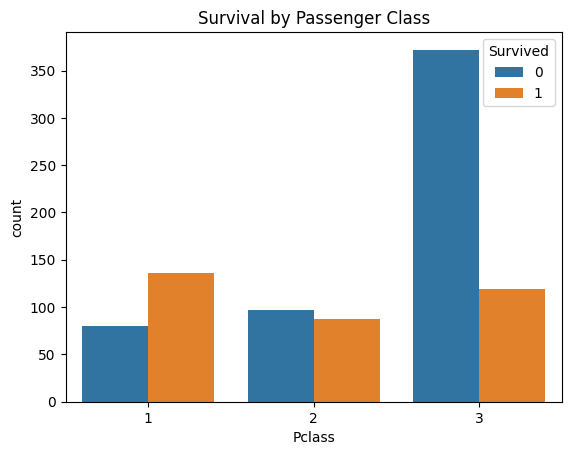

In [7]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

In [8]:
df = pd.get_dummies(df, columns=['Pclass', 'Embarked'], drop_first=True)
print("Data preprocessing completed.")
df.head(2)

Data preprocessing completed.


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,IsAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,0,False,False,False,False


# --- Exploratory Data Analysis (EDA) ---

"""
This section explores the data to gain insights and identify patterns.
"""

In [9]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  FamilySize   891 non-null    int64  
 11  IsAlone      891 non-null    int64  
 12  Pclass_2     891 non-null    bool   
 13  Pclass_3     891 non-null    bool   
 14  Embarked_Q   891 non-null    bool   
 15  Embarked_S   891 non-null    bool   
dtypes: bool(4), float64(2), int64(7), object(3)
memory usage: 87.1+ KB
None
       PassengerId    Survived         Sex         Age       S

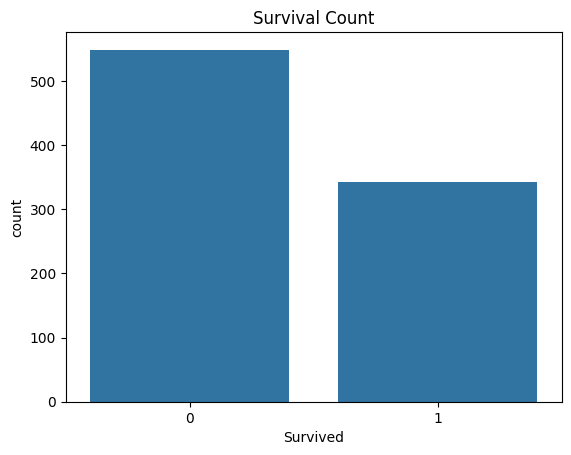

In [10]:
# Visualizations
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

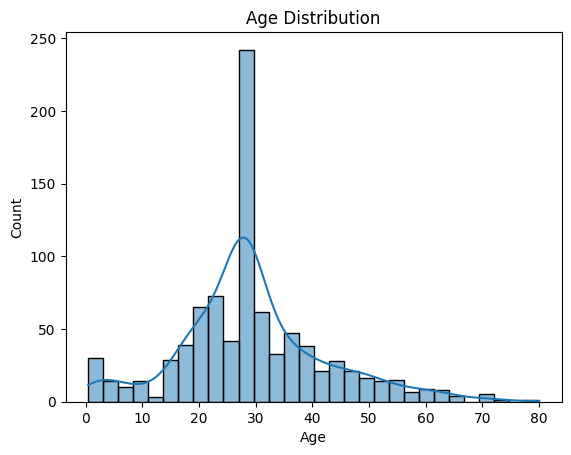

In [11]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

In [12]:
print("Exploratory Data Analysis completed.")

Exploratory Data Analysis completed.


# --- Modelling ---

"""
This section trains and tunes a Random Forest Classifier model.
"""

In [13]:
# Select relevant features
features = ['Pclass_2', 'Pclass_3', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

In [14]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Model Training (Random Forest)
model = RandomForestClassifier(random_state=42)

In [17]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [18]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [19]:
best_model = grid_search.best_estimator_

In [20]:
print("Model training and tuning completed.")

Model training and tuning completed.


# --- Model Evaluation ---

"""
This section evaluates the model's performance.
"""

In [21]:
y_pred = best_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8491620111731844
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       105
           1       0.86      0.76      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

[[96  9]
 [18 56]]


In [22]:
print("Model evaluation completed.")

Model evaluation completed.


# --- Recommendations and Conclusion ---

"""
Based on the model's feature importance, we provide recommendations.
"""

In [23]:
feature_importance = pd.Series(best_model.feature_importances_, index=features).sort_values(ascending=False)
print('\nFeature Importance:\n', feature_importance)


Feature Importance:
 Sex           0.403089
Fare          0.208461
Age           0.159118
Pclass_3      0.099092
FamilySize    0.062025
Embarked_S    0.024764
Pclass_2      0.021386
IsAlone       0.014374
Embarked_Q    0.007691
dtype: float64


In [24]:
print("\nRecommendations based on Feature Importance:")
if 'Sex' in feature_importance.index and feature_importance['Sex'] > 0.1:
    print("- Gender was a significant factor. Prioritize female passengers in evacuation.")
if 'Pclass_1' in feature_importance.index and feature_importance['Pclass_1'] > 0.1:
    print("- Passenger class mattered. Give priority to first-class passengers.")
if 'Age' in feature_importance.index and feature_importance['Age'] > 0.05:
    print("- Age influenced survival. Consider prioritizing children and the elderly.")
if 'FamilySize' in feature_importance.index and feature_importance['FamilySize'] > 0.05:
    print("- Family size played a role. Consider keeping families together during evacuation.")


Recommendations based on Feature Importance:
- Gender was a significant factor. Prioritize female passengers in evacuation.
- Age influenced survival. Consider prioritizing children and the elderly.
- Family size played a role. Consider keeping families together during evacuation.


In [25]:
print("\nConclusion: The Random Forest model achieved a good accuracy in predicting Titanic survival. The analysis of feature importance provides valuable insights for potential evacuation strategies.")


Conclusion: The Random Forest model achieved a good accuracy in predicting Titanic survival. The analysis of feature importance provides valuable insights for potential evacuation strategies.


# --- End --- 